# New York City Taxi Price Prediction

In this notebook, the dataset capturing taxi trips in the city of new york has been explored and analysed to find meaningful insights. The project aims to study relevant features and try to predict the total amount per trip to the best of its ability.

## 1.0 Importing Libraries

All required libraries for the project are imported in this step.

In [23]:
!pip install -q gdown
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf

## 2.0 Import and Explore Dataset

The dataset is downloaded from drive and converted into a pandas dataframe. Basic data exploration is carried out to understand the required next steps.

In [4]:
# Define the file ID and use gdown to download it
file_id = '1G4KEYbsbfwvTCEcuCG5DtFmtIK1lepNg'  # Replace with the actual file ID
destination = 'data.csv'  # Destination to save the file

# Step 3: Construct the file download link and use gdown
download_link = f'https://drive.google.com/uc?id=1G4KEYbsbfwvTCEcuCG5DtFmtIK1lepNg'
!gdown --output {destination} {download_link}

# Step 4: Load the dataset using Pandas
df = pd.read_csv(destination)


Downloading...
From (original): https://drive.google.com/uc?id=1G4KEYbsbfwvTCEcuCG5DtFmtIK1lepNg
From (redirected): https://drive.google.com/uc?id=1G4KEYbsbfwvTCEcuCG5DtFmtIK1lepNg&confirm=t&uuid=ae17e3b1-0747-4d64-b649-8901b03785bf
To: /content/data.csv
100% 594M/594M [00:02<00:00, 252MB/s]


<ipython-input-4-bd6baa88013a>:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(destination)


In [8]:
# Visualise the first 10 rows
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
6,2.0,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0
7,2.0,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.00,5.0,N,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5
8,2.0,2019-12-18 15:30:35,2019-12-18 15:31:35,4.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5
9,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.70,1.0,N,246,48,1.0,8.00,3.0,0.5,2.35,0.0,0.3,14.15,2.5


In [6]:
# Checking the overall timeframe skew within the dataset
min_date = min(df['tpep_pickup_datetime'])
max_date = max(df['tpep_pickup_datetime'])
print(min_date)
print(max_date)

2003-01-01 00:07:17
2021-01-02 01:12:10


In [ ]:
# Overall number of rows and columns
df.shape

(6405008, 18)

In [39]:
df.dtypes

,0
VendorID,float64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


## 3.0 Data Preparation
1. **Filter through only data from 2020** due to resource constraints.This step is implemented due to the large skew of dates that has been noticed during exploration. This step suppresses any inflation characteristics that may affect the total amount.

In [9]:
df = df[df['tpep_pickup_datetime'] >= '2020-01-01']
df = df[df['tpep_pickup_datetime'] < '2021-01-01']

1. **Ensure trip_distance is greater than 0** So faulty trips are removed from the dataset.

In [10]:
df = df[df['trip_distance'] > 0]

2. **Ensure pickup and dropoff time is not the same** to filter through more faulty data



In [11]:
df = df[df['tpep_pickup_datetime'] != df['tpep_dropoff_datetime']]

3. Drop Duplicate rows if any

In [12]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

4. Due to the small number of rows with null values, they are dropped

In [13]:
df = df.dropna()

5. Drop Outliers in the total amount column to ensure rare trips with extremely high or low amounts do not negatively impact our model.

In [14]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df = remove_outlier(df,'total_amount')

In [10]:
df.shape

(5672347, 18)

6. **Random Sample the entire database** Due to the large size of the overall dataset, keeping time constraints in mind, the overall dataset is sampled down to 25000 rows.

In [15]:
df_sampled = df.sample(n=100000, random_state=42)

7. Since timestamp features cannot be used in modelling, the trip duration and the corresponding trip_speed is calculated using pickup and dropoff time.

In [17]:
# Step 1: Convert the pickup and dropoff columns to datetime objects
df_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_sampled['tpep_pickup_datetime'])
df_sampled['tpep_dropoff_datetime'] = pd.to_datetime(df_sampled['tpep_dropoff_datetime'])

# Step 2: Calculate the trip duration (dropoff - pickup)
df_sampled['trip_duration'] = df_sampled['tpep_dropoff_datetime'] - df_sampled['tpep_pickup_datetime']
df_sampled['trip_duration'] = df_sampled['trip_duration'].dt.total_seconds() / 60  # Convert duration to minutes

In [18]:
df_sampled['speed'] = df_sampled['trip_distance'] / (df_sampled['trip_duration'] / 60)

In [ ]:
df_sampled.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'trip_duration', 'speed'],
      dtype='object')

## 4.0 Data Scaling

In [19]:
scaling_columns = [
    'trip_distance', 'fare_amount', 'extra',
    'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'congestion_surcharge',
    'trip_duration', 'speed', 'total_amount'
]

df_selected = df_sampled[scaling_columns]

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)
df_scaled = pd.DataFrame(df_scaled, columns=scaling_columns)

## 5.0 Correlation Matrix

In [18]:
correlation_matrix = df_scaled.corr()

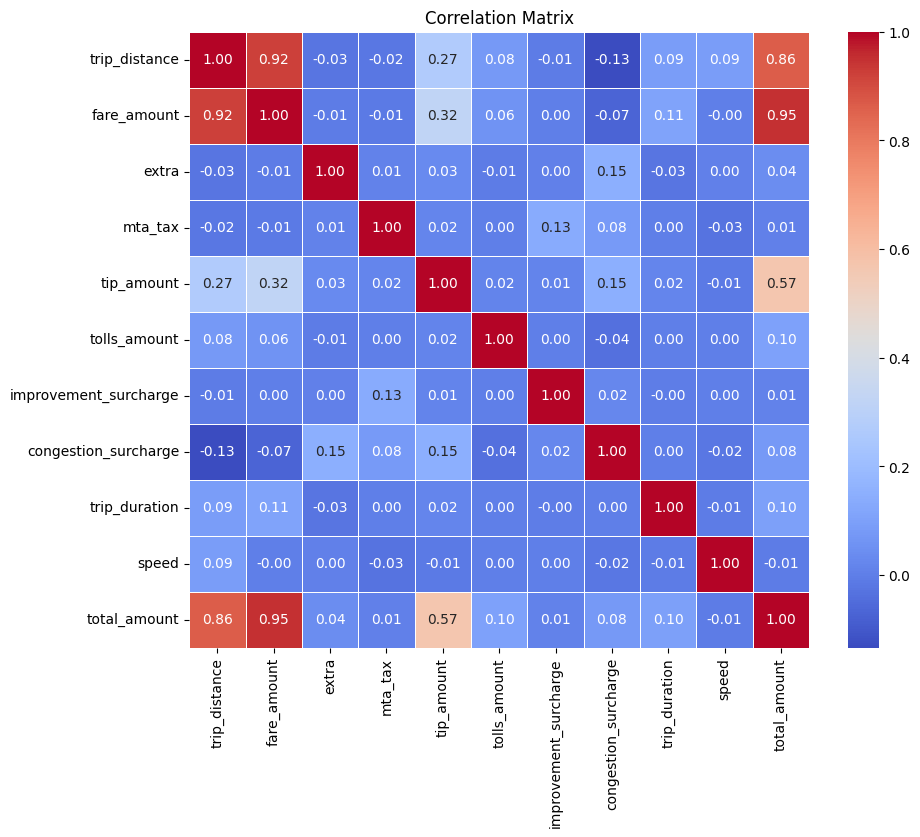

In [19]:
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix')
plt.show()

## 6.0 Modeling

Based on the generated correlation matrix, the features with the highest correlation are seleted for modeling.

In [20]:
# Prepare feature and target datasets
X_sampled = df_scaled[['trip_distance', 'fare_amount', 'tip_amount']]
y_sampled = df_scaled['total_amount']

# Convert to numpy arrays for further processing
X_sampled = np.array(X_sampled)
y_sampled = np.array(y_sampled)


In [16]:
# Check shapes
print("Shape of X_sampled:", X_sampled.shape)
print("Shape of y_sampled:", y_sampled.shape)

# Check data types
print("Data type of X_sampled:", X_sampled.dtype)
print("Data type of y_sampled:", y_sampled.dtype)

# Check for NaN or infinite values
print("Any NaN in X_sampled?", np.any(np.isnan(X_sampled)))
print("Any NaN in y_sampled?", np.any(np.isnan(y_sampled)))
print("Any infinite values in X_sampled?", np.any(np.isinf(X_sampled)))
print("Any infinite values in y_sampled?", np.any(np.isinf(y_sampled)))

# If using a regression model, check if y_sampled is one-dimensional
if len(y_sampled.shape) > 1:
    print("y_sampled should be 1D. Reshaping if necessary.")
    y_sampled = y_sampled.ravel()  # Flatten the array if needed


Shape of X_sampled: (100000, 3)
Shape of y_sampled: (100000,)
Data type of X_sampled: float64
Data type of y_sampled: float64
Any NaN in X_sampled? False
Any NaN in y_sampled? False
Any infinite values in X_sampled? False
Any infinite values in y_sampled? False


## 5.1 Train Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

## 6.2 Baseline Models

Since we are trying to predict the total trip amount, multiple baseline regression models are explored to find the best performing model. This model in turn will be studied in depth to gain a deeper and better understanding on the same.

### 6.2.1 Linear Regression

In [ ]:
# Create and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = linear_regressor.predict(X_test)

# Evaluate the model using RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Print the RMSE
print(f'RMSE: {rmse_lr}')

RMSE: 0.13108093085464614


### 6.2.2 Gradient Boosting Regressor

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred_scaled_gb = gb.predict(X_test)

rmse_gb = np.sqrt(np.mean((y_pred_scaled_gb - y_test) ** 2))
print(f'RMSE: {rmse_gb}')

# Make predictions
y_pred_scaled = gb.predict(X_test)

RMSE: 0.12805192293012427


### 6.2.3 Elastic Net Regressor

In [ ]:
el = ElasticNet()
el.fit(X_train, y_train)

y_pred_scaled_el = el.predict(X_test)

rmse_el = np.sqrt(np.mean((y_pred_scaled_el - y_test) ** 2))
print(f'RMSE: {rmse_el}')

# Make predictions
y_pred_scaled_el = el.predict(X_test)

RMSE: 0.6911612537506935


### 6.2.4 MultiLayer Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(X_train, y_train)

y_pred_scaled_mlp = mlp.predict(X_test)

rmse_mlp = np.sqrt(np.mean((y_pred_scaled_mlp - y_test) ** 2))
print(f'RMSE: {rmse_mlp}')

# Make predictions
y_pred_scaled_mlp = mlp.predict(X_test)

RMSE: 0.12780219988221314


In [ ]:
if rmse_lr < rmse_gb and rmse_lr < rmse_el and rmse_lr < rmse_mlp:
    print("Linear Regression is the best model.")
elif rmse_gb < rmse_lr and rmse_gb < rmse_el and rmse_gb < rmse_mlp:
    print("Gradient Boosting is the best model.")
elif rmse_el < rmse_lr and rmse_el < rmse_gb and rmse_el < rmse_mlp:
    print("Elastic Net is the best model.")
else:
    print("Multilayer Perceptron is the best model.")

Multilayer Perceptron is the best model.


We see that the multilayer perceptron is the best performing model with the gradient boosting regressor also throwing out very similar results. Due to this, both these models are created from scratch to gain a deep understanding on their workings and mechanisms.

# 6.3 Multi-Layer Perceptron without Packages
A Multilayer Perceptron (MLP) is a type of artificial neural network composed of an input layer, one or more hidden layers, and an output layer. MLPs utilize nonlinear activation functions, such as ReLU, to learn complex relationships in data, making them suitable for various tasks, including regression and classification.

In [36]:
# Activation functions and their derivatives
def relu(x):
    return tf.maximum(x, 0)

def relu_derivative(x):
    return tf.cast(x > 0, tf.float32)

def linear(x):
    return x

class MultilayerPerceptron:
    def __init__(self, X_sampled, y_sampled, hidden_layers):
        self.X_sampled = X_sampled
        self.y_sampled = y_sampled
        self.hidden_layers = hidden_layers
        self.weights = []
        self.biases = []
        self.rmse_history = []  # To store RMSE values during training

        # Adam optimizer from TensorFlow
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        # Xavier initialization for weights
        input_dim = X_sampled.shape[1]
        for i in range(len(hidden_layers) + 1):
            if i == 0:
                self.weights.append(tf.Variable(np.random.randn(input_dim, hidden_layers[i]) * np.sqrt(2 / input_dim), dtype=tf.float32))
                self.biases.append(tf.Variable(np.zeros((1, hidden_layers[i])), dtype=tf.float32))
            elif i == len(hidden_layers):
                self.weights.append(tf.Variable(np.random.randn(hidden_layers[i-1], 1) * np.sqrt(2 / hidden_layers[i-1]), dtype=tf.float32))
                self.biases.append(tf.Variable(np.zeros((1, 1)), dtype=tf.float32))
            else:
                self.weights.append(tf.Variable(np.random.randn(hidden_layers[i-1], hidden_layers[i]) * np.sqrt(2 / hidden_layers[i-1]), dtype=tf.float32))
                self.biases.append(tf.Variable(np.zeros((1, hidden_layers[i])), dtype=tf.float32))

    def forward_pass(self, X_sampled):
        activations = [X_sampled]
        for i in range(len(self.hidden_layers) + 1):
            z = tf.matmul(activations[-1], self.weights[i]) + self.biases[i]
            if i == len(self.hidden_layers):  # Output layer
                a = linear(z)
            else:  # Hidden layers
                a = relu(z)
            activations.append(a)
        return activations

    def train(self, X_sampled, y_sampled, epochs):
        # Convert input data to TensorFlow tensors
        X_sampled = tf.convert_to_tensor(X_sampled, dtype=tf.float32)
        y_sampled = tf.convert_to_tensor(y_sampled, dtype=tf.float32)

        for i in range(epochs):
            with tf.GradientTape() as tape:
                activations = self.forward_pass(X_sampled)
                y_pred = activations[-1]
                loss = tf.reduce_mean((y_sampled - y_pred) ** 2)

            # Compute gradients using TensorFlow's GradientTape
            grads = tape.gradient(loss, self.weights + self.biases)

            # Apply the gradients using the Adam optimizer
            self.optimizer.apply_gradients(zip(grads, self.weights + self.biases))

            # Store RMSE at each epoch
            rmse = tf.sqrt(loss)
            self.rmse_history.append(rmse.numpy())

            if i % 100 == 0:
                print(f'Epoch {i}, RMSE: {rmse:.4f}')

    def predict(self, X_sampled):
        # Convert input data to TensorFlow tensor
        X_sampled = tf.convert_to_tensor(X_sampled, dtype=tf.float32)
        return self.forward_pass(X_sampled)[-1].numpy()

    def plot_rmse(self):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.plot(self.rmse_history, label='Training RMSE')
        plt.title('RMSE over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.grid(True)
        plt.legend()
        plt.show()

In [28]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Initialize and train the model
mlp = MultilayerPerceptron(X_train, y_train, [10, 5])
mlp.train(X_train, y_train, epochs=5000)


Epoch 0, RMSE: 1.0429
Epoch 100, RMSE: 0.6159
Epoch 200, RMSE: 0.3127
Epoch 300, RMSE: 0.2387
Epoch 400, RMSE: 0.2011
Epoch 500, RMSE: 0.1774
Epoch 600, RMSE: 0.1624
Epoch 700, RMSE: 0.1534
Epoch 800, RMSE: 0.1487
Epoch 900, RMSE: 0.1458
Epoch 1000, RMSE: 0.1438
Epoch 1100, RMSE: 0.1423
Epoch 1200, RMSE: 0.1411
Epoch 1300, RMSE: 0.1401
Epoch 1400, RMSE: 0.1394
Epoch 1500, RMSE: 0.1387
Epoch 1600, RMSE: 0.1380
Epoch 1700, RMSE: 0.1375
Epoch 1800, RMSE: 0.1370
Epoch 1900, RMSE: 0.1365
Epoch 2000, RMSE: 0.1359
Epoch 2100, RMSE: 0.1355
Epoch 2200, RMSE: 0.1352
Epoch 2300, RMSE: 0.1350
Epoch 2400, RMSE: 0.1348
Epoch 2500, RMSE: 0.1345
Epoch 2600, RMSE: 0.1344
Epoch 2700, RMSE: 0.1342
Epoch 2800, RMSE: 0.1340
Epoch 2900, RMSE: 0.1339
Epoch 3000, RMSE: 0.1337
Epoch 3100, RMSE: 0.1336
Epoch 3200, RMSE: 0.1335
Epoch 3300, RMSE: 0.1334
Epoch 3400, RMSE: 0.1332
Epoch 3500, RMSE: 0.1331
Epoch 3600, RMSE: 0.1331
Epoch 3700, RMSE: 0.1330
Epoch 3800, RMSE: 0.1329
Epoch 3900, RMSE: 0.1328
Epoch 4000, 

In [29]:
y_pred = mlp.predict(X_test)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f'Test RMSE: {rmse:.4f}')

Test RMSE: 0.1290


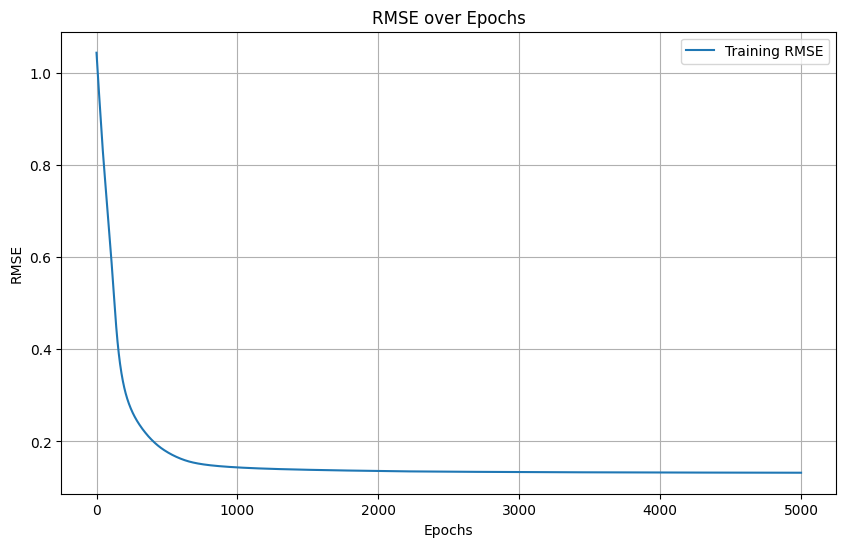

In [30]:
mlp.plot_rmse()

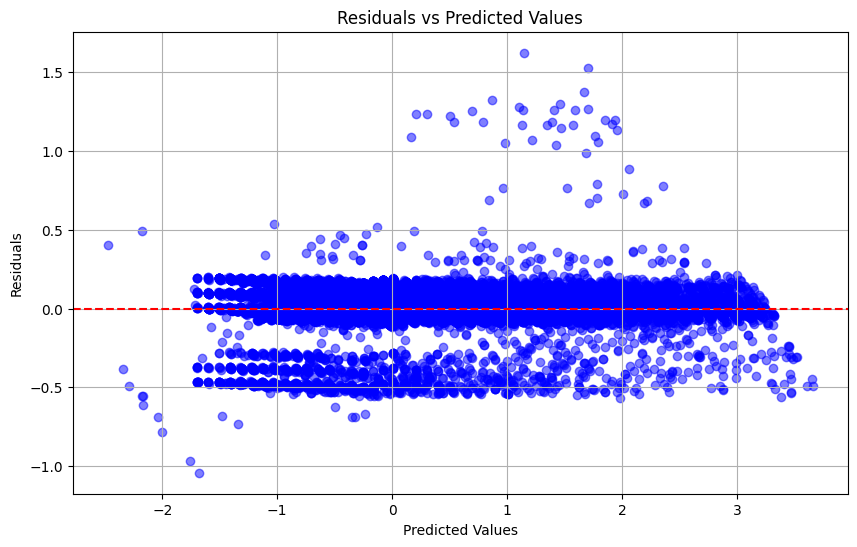

In [39]:
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

# Example of how to use it after you have y_test and y_pred
y_pred = mlp.predict(X_test)  # Assuming you already have this from your MLP model
plot_residuals(y_test, y_pred)